# Перспективная игра


##### Описание проекта:
Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

##### Задача:
Выявить определяющие успешность игры закономерности и определить потенциально популярный продукт для дальнейшего планирования  рекламных кампаний.

##### Этапы анализа:

- первичный анализ данных
- предобработка данных (устранение дубликатов, если имеются, выбросов, исправление типов данных, заполнение пропусков, добавление необходимых данных в датасет)
- исследовательский анализ: пределение факторов, влияющих на продажи, определение лидеров продаж
- составление портретов регионов (самые популярные жанры и платформы, факторы популярности)
- проверка гипотез о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые; редкие пользовательские рейтинги жанров Action и Sports разные)
- общий вывод и решение поставленной задачи


# Шаг 1: Изучим общую информацию из имеющихся данных

In [1]:

import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Импортируем данные:

df = pd.read_csv('/datasets/games.csv')
print(df.info())
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [2]:
#Посмотрим какие столбцы у нас имеются и все ли с ними впорядке
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [3]:
#Посчитаем количество пустых значений
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [4]:
#Посмотрим на таблицу, где имеются пустые значения в столбце critic_score
df[df['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
#Посмотрим на таблицу, где имеются пустые значения в столбце user_score
df[df['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
#Посмотрим на таблицу, где имеются пустые значения в столбце rating
df[df['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
#Посмотрим на таблицу, где имеются пустые значения в столбце year_of_release
df[df['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
#Посмотрим какие платформы для игры у нас имеются
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [9]:
#Посмотрим какие жанры игр мы имеем и нет ли повторений
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [10]:
# Посчитаем количество дубликатов
df.duplicated().sum()

0

1. Необходимо привести к правильному типу столбец : Year of Release.
2. Также нужно привести к нижнему регистру столбцы нашей таблицы, а так же сами названия колонок.
3. Имеются пустые значения в столбцах rating, user_score, critic_score. Мы можем заменить имеющиеся пустые значения в таблице: year of release на года от той же игры только другой платформы, в остальных случаях решим в процессе предобработки.
4. Дубликатов не имеется.

# Шаг 2. Подготовим данные

### TO DO LIST:

Заменить названия столбцов (приведем к нижнему регистру);

Преобразовать данные в нужные типы. Описать, в каких столбцах заменила тип данных и почему;

Обработать пропуски при необходимости:
Объяснить, почему заполнила пропуски определённым образом или почему не стала это делать;
Описать причины, которые могли привести к пропускам;

Обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разобрать это значение и описать, как его обработать;

Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

In [11]:
# Заменим названия столбцов (приведем к нижнему регистру) 
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [12]:
df['rating'] = df['rating'].fillna(0)

In [13]:
# Изменим тип данных в столбце year_of_release 
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [14]:
#Посмотрим как выглядит теперь наша таблица
df.sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4488,Hyrule Warriors,3DS,2016,Action,0.17,0.13,0.11,0.03,NaN,NaN,0
5788,SD Gundam G Generation: Overworld,PSP,2012,Strategy,0.00,0.00,0.31,0.00,NaN,NaN,0
3929,Silent Hill 4: The Room,PS2,2004,Action,0.25,0.19,0.00,0.06,76.0,7.8,M
8822,Shadow Ops: Red Mercury,XB,2004,Shooter,0.11,0.03,0.00,0.01,61.0,6.1,T
1791,Pilotwings,SNES,1990,Simulation,0.46,0.17,0.48,0.02,NaN,NaN,0
15509,Dragon Ball Z: Buu's Fury / Dragon Ball GT: Tr...,GBA,2006,Action,0.01,0.01,0.00,0.00,NaN,NaN,0
12400,TrackMania Turbo,XOne,2016,Action,0.02,0.04,0.00,0.00,76.0,7.7,E
15996,Harukanaru Toki no Naka de 6,PSP,2015,Action,0.00,0.00,0.02,0.00,NaN,NaN,0
6778,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,0.12,0.08,0.00,0.04,NaN,8.6,E10+
437,Club Penguin: Elite Penguin Force,DS,2008,Adventure,1.87,0.97,0.00,0.30,NaN,8,E


In [15]:
# Посчитаем количество пустых значений в столбце year_of_release
df['year_of_release'].isna().sum()

269

In [16]:
#Напишем цикл где будем делать замену на года тех у кого совпадает название с игрой, но в графе year_of_release пусто
for i in df[df['year_of_release'].isnull() == True].index:  
    df['year_of_release'][i] = df.loc[df['name'] == df['name'][i], 'year_of_release'].max()

In [17]:
#Посмотрим сколько удалось заполнить пустых значений
df['year_of_release'].isna().sum()

146

In [18]:
#Аббревиатура tbd значит to be determined, to be done. 
#То есть, данные были нарочно не заполнены, так как не определились с рейтингом. 
#Поэтому заменим tbd на Nan

#Заменим tbd на Nan
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)

In [19]:
# Поменяем формат столбца user_score на float
df['user_score'] = df['user_score'].astype(float)
df['user_score'].dtype


dtype('float64')

In [20]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')

In [21]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,0,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,0,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,0,0.01


# Шаг 3. Проведем исследовательский анализ данных

## TO DO LIST:

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Соотнесем выводы с продажами игр на других платформах.

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

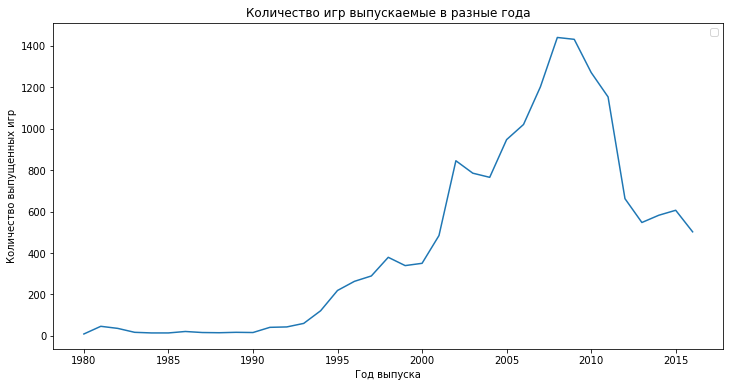

In [22]:
# Методом пивот отсортируем таблицы и отрисуем график, чтобы просмотреть как менялось количество выпускаемых игр
games_on_period = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=games_on_period)
plt.title("Количество игр выпускаемые в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('');

### Вывод:

- Из графика видно, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. 
- С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, виден резкий спад консольных игр.


Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

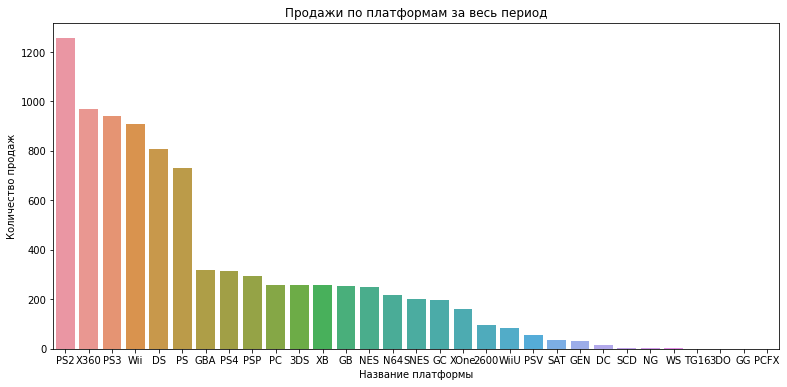

In [23]:
platform_on_sales = df.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', 
                                                                       ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж");

Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS.


In [24]:
# Напишем функцию, которая будет возвращать нужную сводную таблицу 
# и выводить данные с 2005 года
def year_total_sale_for_platform(name, data):
    slicee = data[(data['platform'] == name) & (data['year_of_release'] > 2005)]
    total = slicee.pivot_table(index='year_of_release', values='total_sales', 
                               aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

In [25]:
# Создадим свою таблицу по платформам и их обшим продажам
# отсортируем их по убыванию и оставим только топ 5.
top_5_platforms = df.pivot_table(index='platform', values='total_sales', 
                                 aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)

In [26]:
top_5_platforms

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


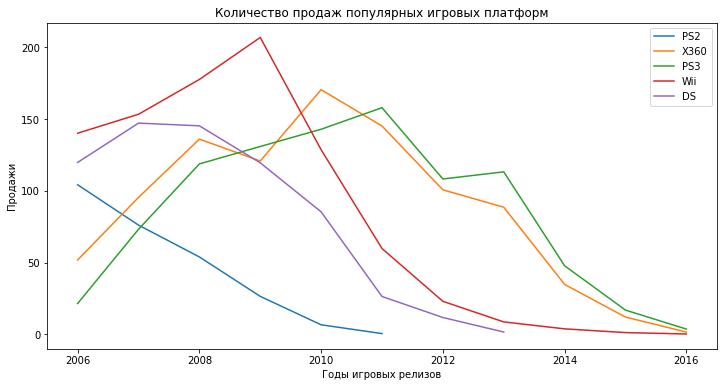

In [27]:
#Отрисуем все игровые платформы и их поведение за последние 10 лет
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_5_platforms['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,df)['total_sales'], label=i)
    plt.legend()

Вывод:

- Практически все игровые платформы в среднем существуют по 10 лет. 
- Cамые продаваемые это Sony Play Station и XBOX. 
- Самый пик наступает примерно через 5 лет после выхода приставки.
- у Nintento WII был быстрый скачок в 2009 году и такой же резкий провал.

In [28]:
# Теперь внутри данных за актуальный период выберем наиболее прибыльные платформы
actual_data = df.query('year_of_release > 2013') #возьмем все данные после 2013 года




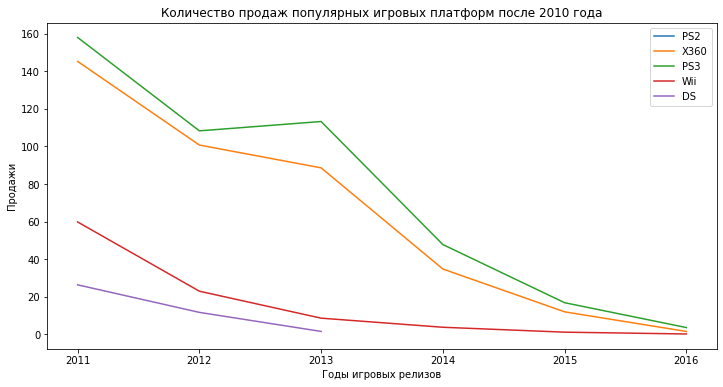

In [29]:
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ после 2010 года')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_5_platforms['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,df.query('year_of_release > 2010'))['total_sales'], label=i)
    plt.legend();

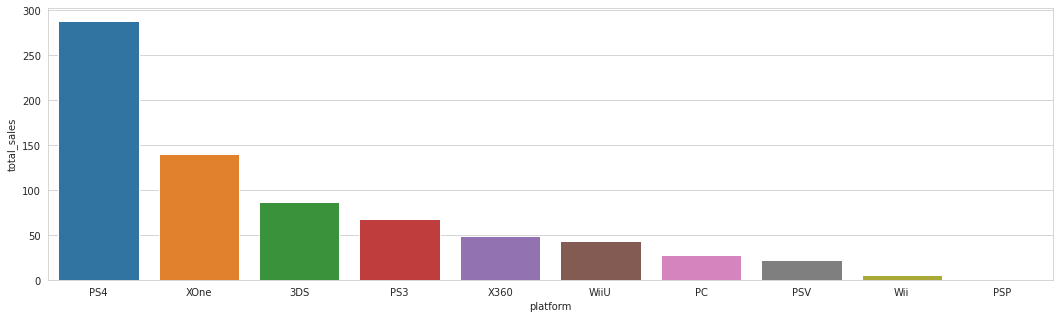

In [30]:
# Какие платформы лидируют по продажам, растут или падают 
# Выберем несколько потенциально прибыльных платформ

actual_2016_pvt = actual_data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)

sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.barplot(data = actual_2016_pvt, x='platform', y='total_sales');

In [31]:
# возьмем некий датафрейм

actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,0,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,0,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,0,7.98


In [32]:
# сделаем группировку по платформам для того, чтобы определить топ-5 платформ с макисмальными продажами

actual_groupby = actual_data \
                        .pivot_table(index=['platform'], values='total_sales', aggfunc='sum') \
                        .reset_index() \
                        .sort_values(by='total_sales', ascending=False)

actual_groupby

,platform,total_sales
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22
7,WiiU,42.98
1,PC,27.40
5,PSV,22.40
6,Wii,5.07
4,PSP,0.36


In [33]:
# а теперь - названия платформ нам надо сохранить в список (чтобы дальше фильтровать данные только по этим платформам)
# но сделать это НЕ руками, НЕ ТАК: list_of_top5 = ['PS2','X360','PS3','Wii','DS'], а автоматизированно, в коде

list_of_top5 = actual_groupby['platform'].head().tolist()

list_of_top5

['PS4', 'XOne', '3DS', 'PS3', 'X360']

In [34]:
df_top_5_platforms = df[df['platform'].isin(['PS4', 'XOne', '3DS', 'PS3', 'X360'])]

In [35]:
df_top_5_platforms['total_sales'].describe()

count    3752.000000
mean        0.704566
std         1.482098
min         0.000000
25%         0.090000
50%         0.240000
75%         0.700000
max        21.820000
Name: total_sales, dtype: float64

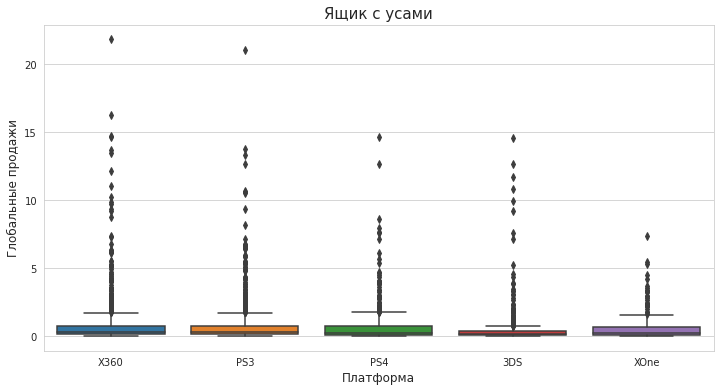

In [36]:
#Отрисуем ящики с усами 
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_5_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

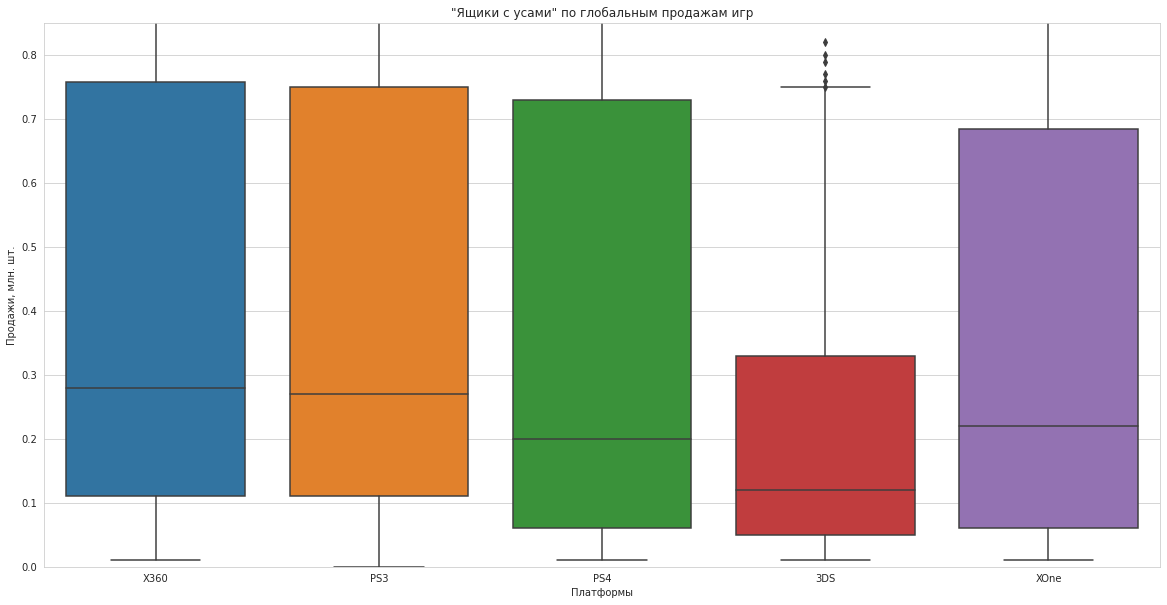

In [37]:
plt.figure(figsize=(20, 10))

sns.boxplot(data=df_top_5_platforms, x='platform', y='total_sales')

plt.ylim(0, 0.85)

plt.title('"Ящики с усами" по глобальным продажам игр')
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн. шт.')

plt.show()

Вывод:

- Провели срез данных для того, чтоыб отрисовать ящики с усами. 
- Исходя из графиков видно, что медиана протекает у всех по разному.
- Больше всех продаж у PS4, затем у XOne, после у 3DS.	

In [38]:
#Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
#Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 
#Сформулируем выводы.

#Корреляция между оценками пользователей и продажами 
sony_play_station2 = actual_data[actual_data['platform']=='XOne']
sony_play_station2['total_sales'].corr(sony_play_station2['user_score'])

-0.0703839280647581

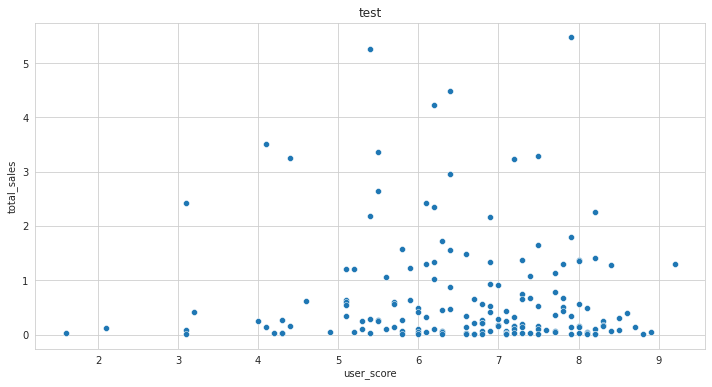

In [39]:
#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=sony_play_station2)
plt.title('test');

In [40]:
#Корреляция между оценкой критиков и продажам
sony_play_station2['critic_score'].corr(sony_play_station2['total_sales'])

0.42867694370333226

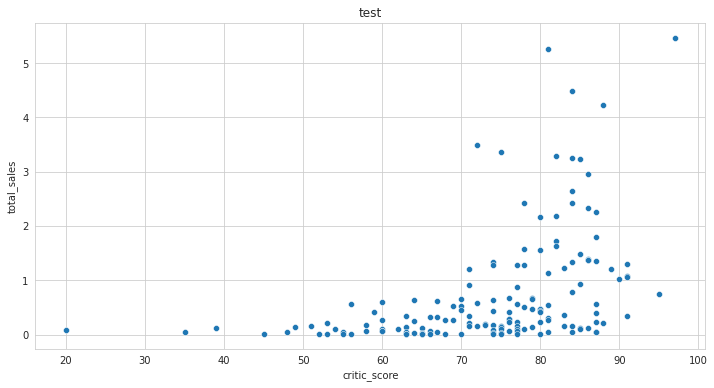

In [41]:
#Построим диаграмму рассеяния по оценкам критиков 
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sony_play_station2)
plt.title('test');

In [42]:
#Соотнесем выводы с продажами игр на других платформах.
#Напишем функцию, которая будет отрисовывать графики рассеивания и считать корреляции
def other_platform_matrix(name_of_platform):
    platform = actual_data[actual_data['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
    
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и продажами ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и продажами ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и продажами ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и продажами ', name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и продажами ', name_of_platform.upper(), ': Сильная', critic_correl)
    
    if 0.3 >= correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', correl)
    if 0.5 >= correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', correl)
    if 0.7 >= correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', correl)
    if 0.9 >= correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', correl)
    if 1 >= correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная', correl)
    print('\n')

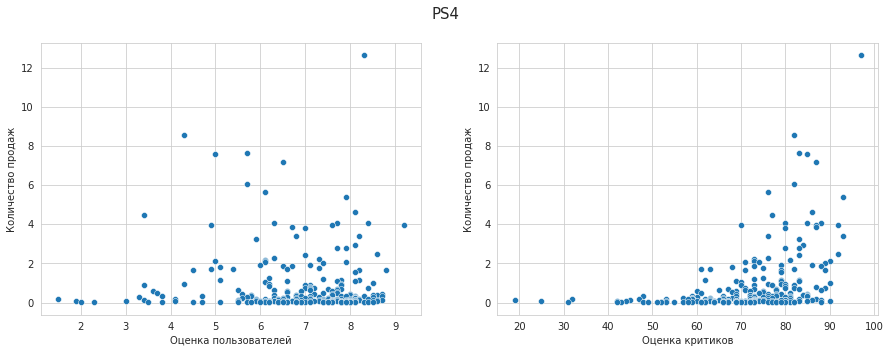

Корреляция между отзывами критиков и продажами  PS4 : Умеренная 0.40266141068104083




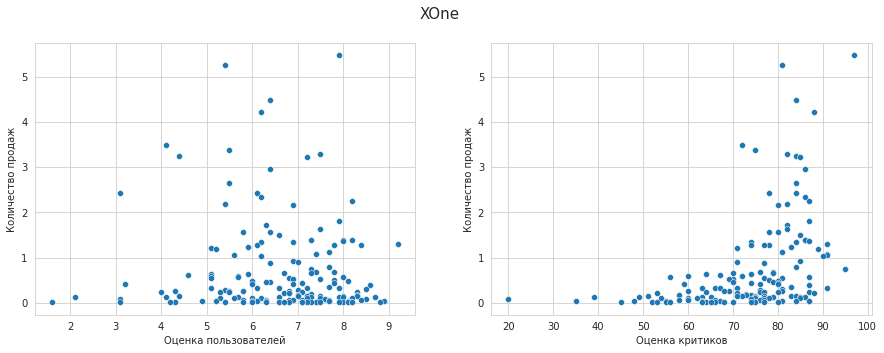

Корреляция между отзывами критиков и продажами  XONE : Умеренная 0.42867694370333226




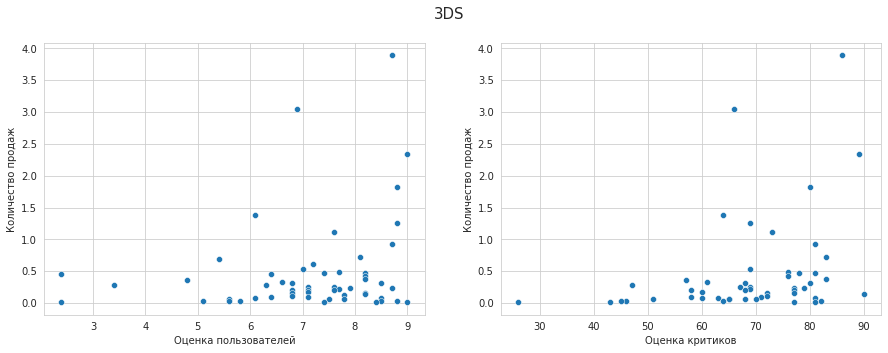

Корреляция между отзывами критиков и продажами  3DS : Умеренная 0.314117492869051
Корреляция между отзывами пользователей и продажами  3DS : Слабая 0.2151932718527028




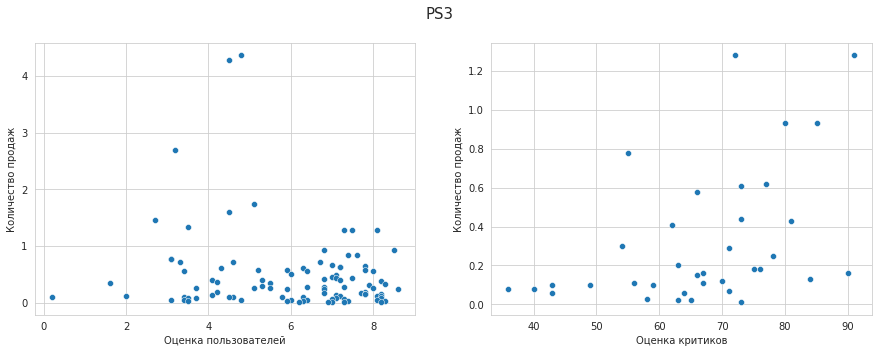

Корреляция между отзывами критиков и продажами  PS3 : Умеренная 0.44657460493190704




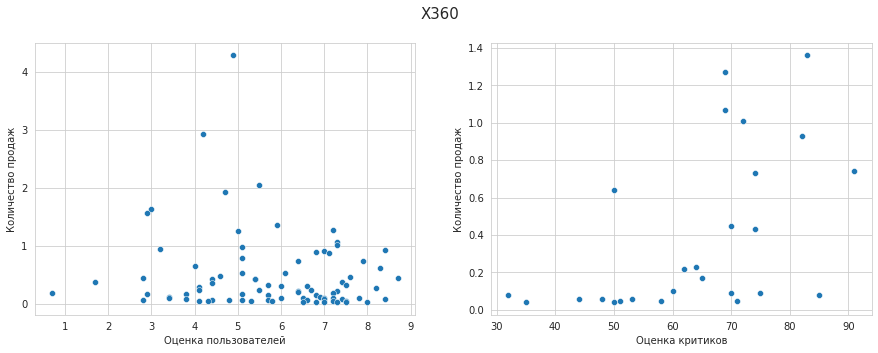

Корреляция между отзывами критиков и продажами  X360 : Высокая 0.5257228356581523




In [43]:
#С помощью цикла выведем все 5 графиков
for platform in list_of_top5:
    other_platform_matrix(platform)

In [44]:
#Посчитаем дисперсию, стандартное отклонение, среднее и медиану у топ 5 платформ к оценкам пользователей
for platform in list_of_top5:
    print('Дисперсия', platform.upper(),':', np.var(actual_data[actual_data['platform']==platform]['user_score']))
    print('Стандартное отклонение', platform.upper(),':', np.std(actual_data[actual_data['platform']==platform]['user_score']))
    print('Среднее',platform.upper(),':',  actual_data[actual_data['platform']==platform]['user_score'].mean())
    print('Медиана',platform.upper(),':',  actual_data[actual_data['platform']==platform]['user_score'].median())
    print('\n')

Дисперсия PS4 : 1.949210436445598
Стандартное отклонение PS4 : 1.3961412666509065
Среднее PS4 : 6.82809917355372
Медиана PS4 : 7.1


Дисперсия XONE : 1.879546005509642
Стандартное отклонение XONE : 1.3709653553280046
Среднее XONE : 6.594545454545454
Медиана XONE : 6.8


Дисперсия 3DS : 2.2194512396694215
Стандартное отклонение 3DS : 1.4897822792842657
Среднее 3DS : 7.138181818181819
Медиана 3DS : 7.4


Дисперсия PS3 : 3.39938775510204
Стандартное отклонение PS3 : 1.843742865776581
Среднее PS3 : 6.014285714285714
Медиана PS3 : 6.550000000000001


Дисперсия X360 : 2.8875976193932353
Стандартное отклонение X360 : 1.6992932705666892
Среднее X360 : 5.7710843373493965
Медиана X360 : 6.0




In [45]:
#Посчитаем дисперсию, стандартное отклонение, среднее и медиану у топ 5 платформ к оценкам критиков
for platform in list_of_top5:
    print('Дисперсия', platform.upper(),':', np.var(actual_data[actual_data['platform']==platform]['critic_score']))
    print('Стандартное отклонение', platform.upper(),':', np.std(actual_data[actual_data['platform']==platform]['critic_score']))
    print('Среднее',platform.upper(),':',  actual_data[actual_data['platform']==platform]['critic_score'].mean())
    print('Медиана',platform.upper(),':',  actual_data[actual_data['platform']==platform]['critic_score'].median())
    print('\n')

Дисперсия PS4 : 148.57629653367516
Стандартное отклонение PS4 : 12.189187689656565
Среднее PS4 : 72.16455696202532
Медиана PS4 : 73.0


Дисперсия XONE : 149.15737773152964
Стандартное отклонение XONE : 12.21300035746866
Среднее XONE : 73.79354838709678
Медиана XONE : 76.0


Дисперсия 3DS : 162.09765474817377
Стандартное отклонение 3DS : 12.731757724217571
Среднее 3DS : 68.98039215686275
Медиана 3DS : 69.0


Дисперсия PS3 : 178.69135802469134
Стандартное отклонение PS3 : 13.367548691689562
Среднее PS3 : 66.55555555555556
Медиана PS3 : 67.0


Дисперсия X360 : 218.04289940828403
Стандартное отклонение X360 : 14.766275746046599
Среднее X360 : 63.73076923076923
Медиана X360 : 67.0




In [46]:
#Посмотрим на общее распределение игр по жанрам. 
# Методом сводных таблиц выведем жанры и их продажи. Отсортируем по убыванию. 
distr_genre = actual_data.pivot_table(
    index='genre', values='total_sales', aggfunc='mean').sort_values(by='total_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
distr_genre

,genre,total_sales
0,Shooter,1.335469
1,Sports,0.680000
2,Platform,0.476053
3,Fighting,0.470333
4,Role-Playing,0.459005
5,Racing,0.398841
6,Misc,0.332301
7,Action,0.322113
8,Simulation,0.298409
9,Puzzle,0.157857


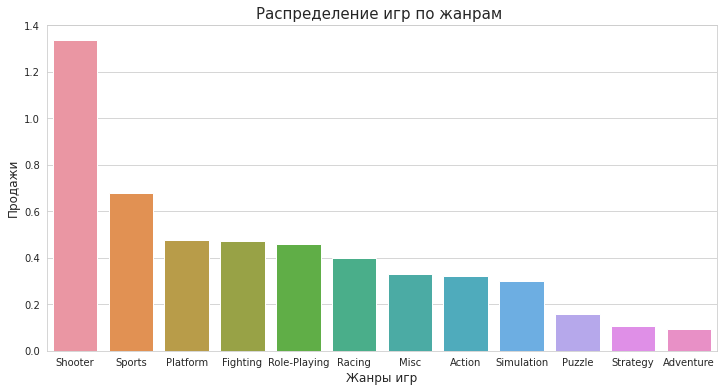

In [47]:
#Отрисуем барплот чтобы наглядно посмотреть какие жанры лидирует, а какие остаются внизу
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12);

Лучше всего продается жанр "Шутер". Жанр "Приключения" остается на последнем месте.

###### Вывод по исследовательскому анализу данных:

Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.

Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.

Средняя жизнь игровой платформы составляет 10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.

Больше всего продаются игры на Sony Playstation и Xbox 360.
Nintendo WII как быстро появился также быстро и потух. Возможно потому что появился прям перед выходом мобильных приложений и игр.

За последние 3 года было заметно,что больше всех продаж у PS4, затем у XOne, после у 3DS.

У всех платформ наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Заметнее всего корреляция между отзывами критиков и игровой платформой  X360. Это значит для людей мнение критиков важнее мнения других пользователей.

# Шаг 4. Составим портрет пользователя каждого региона

TO DO:

- Определим для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясним разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [48]:
#Напишем функции для создания сводных таблиц и отсривоки барплотов

#Функция для создания сводной таблицы за период после 2013 года
def for_pivot_2017(row, title):
    temp = actual_data
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n')
        sns.set_palette("BuGn_r")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

  platform  na_sales
0      PS4     98.61
1     XOne     81.27
2     X360     28.30
3      3DS     22.64
4      PS3     22.05



          genre  na_sales
0       Shooter     79.02
1        Action     72.59
2        Sports     46.13
3  Role-Playing     33.47
4          Misc     15.05



  rating  na_sales
0      M     96.48
1      0     64.72
2      E     50.74
3      T     38.95
4   E10+     33.23





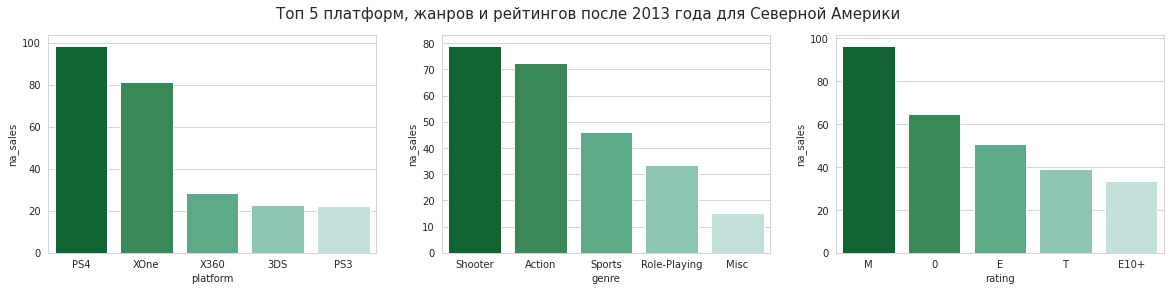

In [49]:
#Выведем топ 5 платформ, жанров и рейтингов после 2013 года для Северной Америки
for_pivot_2017('na_sales','Топ 5 платформ, жанров и рейтингов после 2013 года для Северной Америки')

Вывод:

Самые популярные игровые платформы в Северной Америке за все время это: X360, PS4, XOne, 3DS, PS3.
Топ 5 жанров в Северной Америке за все время: action, shooter, sports, role-playing, misc.
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом «от 17 лет», на втором месте игры с рейтингом "для всех" и на третьем месте игры с рейтингом «для всех старше 10 лет».


  platform  eu_sales
0      PS4    130.04
1     XOne     46.25
2      PS3     25.54
3       PC     18.22
4      3DS     16.12



          genre  eu_sales
0        Action     74.93
1       Shooter     65.52
2        Sports     45.73
3  Role-Playing     28.17
4        Racing     14.13



  rating  eu_sales
0      M     93.69
1      0     58.95
2      E     58.06
3      T     34.07
4   E10+     26.16





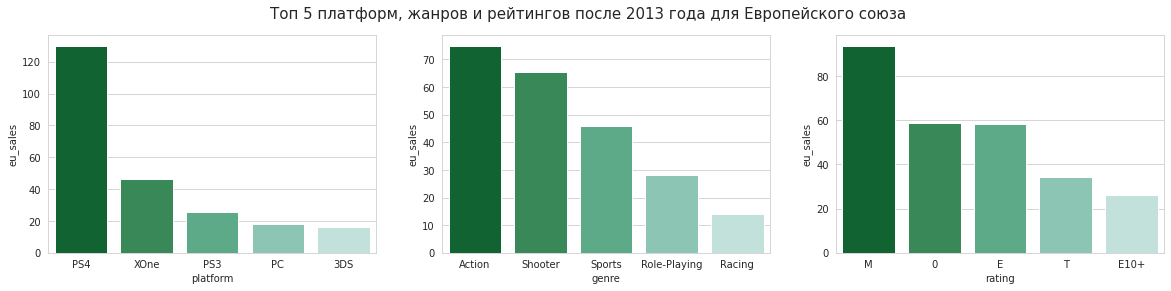

In [50]:
#Выведем топ 5 платформ, жанров и рейтингов после 2013 года для Европейского союза
for_pivot_2017('eu_sales','Топ 5 платформ, жанров и рейтингов после 2013 года для Европейского союза')

Вывод:

Самые популярные игровые платформы в Европе после 2013 года это: PS3, PS4, XOne, 3DS, PC.
Топ 5 жанров в Европе : action, sports, shooter, racing, role-playing.
По рейтингам видно, что больше всего продаж у игр с рейтингом "от 17 лет", на втором месте игры с рейтингом "для всех" и на третьем месте игры с рейтингом «подросткам 13—19 лет».



  platform  jp_sales
0      3DS     44.24
1      PS4     15.02
2      PSV     14.54
3      PS3     11.22
4     WiiU      7.31



          genre  jp_sales
0  Role-Playing     31.16
1        Action     29.58
2      Fighting      6.37
3          Misc      5.61
4       Shooter      4.87



  rating  jp_sales
0      0     56.90
1      T     14.78
2      E      8.94
3      M      8.01
4   E10+      4.46





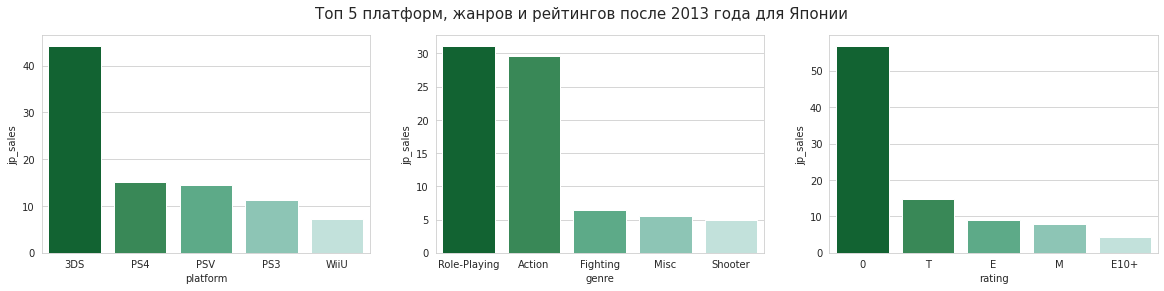

In [51]:
#Выведем топ 5 платформ, жанров и рейтингов после 2013 года для Японии
for_pivot_2017('jp_sales','Топ 5 платформ, жанров и рейтингов после 2013 года для Японии')

Вывод:

Самые популярные игровые платформы в Японии это: 3DS, PS3, Wiiu, PSV, PS4.
Топ 5 жанров в Японии : Role-Playing, action, fighting, shooter, misc.
По рейтингам видно, что больше всего продаж у игр с рейтингом "подросткам 13—19 лет", на втором месте игры с рейтингом "для всех" и на третьем месте игры с рейтингом "от 17 и выше".


#### Вывод по составлению портрета пользователя каждого региона

Самые популярные игровые платформы в Северной Америке за все время это: X360, PS4, XOne, 3DS, PS3.
Топ 5 жанров в Северной Америке за все время: action, shooter, sports, role-playing, misc.
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом «от 17 лет», на втором месте игры с рейтингом "для всех" и на третьем месте игры с рейтингом «для всех старше 10 лет».

Самые популярные игровые платформы в Европе после 2013 года это: PS3, PS4, XOne, 3DS, PC.
Топ 5 жанров в Европе : action, sports, shooter, racing, role-playing.
По рейтингам видно, что больше всего продаж у игр с рейтингом "от 17 лет", на втором месте игры с рейтингом "для всех" и на третьем месте игры с рейтингом «подросткам 13—19 лет».


Самые популярные игровые платформы в Японии это: 3DS, PS3, Wiiu, PSV, PS4.
Топ 5 жанров в Японии : Role-Playing, action, fighting, shooter, misc.
По рейтингам видно, что больше всего продаж у игр с рейтингом "подросткам 13—19 лет", на втором месте игры с рейтингом "для всех" и на третьем месте игры с рейтингом "от 17 и выше".

Для прогноза будущих продаж лучше брать данные после 2013 года, так как технологии меняются с очень быстрыми темпами, и вкусы людей также могут меняться очень быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра action, для платформы PS4 и с рейтингом "от 17 и выше".

# Шаг 5. Проверим гипотезы

TO DO:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и 
Sports (англ. «спортивные соревнования») разные.
- Пороговое значение alpha зададим самостоятельно.
- Поясним:
    - Как мы сформулировали нулевую и альтернативную гипотезы;
    - Какой критерий применили для проверки гипотез и почему.
    
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевые гипотезы:
Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [52]:
# Сохраним в переменных xbox_hyp и pc_hyp соответствующие данные (актуальные данные после 2010 года)
xone_hyp = actual_data[(actual_data['platform']=='XOne')]['user_score']
pc_hyp = actual_data[(actual_data['platform']=='PC')]['user_score']

#Посчитаем средний рейтинг пользователя для xbox платформ
xone_hyp.mean()

6.594545454545454

In [53]:
#Посчитаем средний рейтинг пользователя для PC платформ
pc_hyp.mean()

6.316260162601626

In [54]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(xone_hyp.dropna(), pc_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.13923712043548309
Не получилось отвергнуть нулевую гипотезу


### Вывод

Значение p-value равно 13%. Таким образом, не получилось опровергнуть нулевую гипотезу. То есть, с вероятностью в 13% можно получить различность рейтингов двух платформ.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевые гипотезы:
Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [55]:
# Сохраним в переменных genre_action_hyp и genre_sports_hyp соответствующие данные с пользовательскими оценками
genre_action_hyp = actual_data[(actual_data['genre']=='Action')]['user_score']
genre_sports_hyp = actual_data[(actual_data['genre']=='Sports')]['user_score']

#выведем среднюю оценку по жанру экшн
genre_action_hyp.mean()

6.766442953020134

In [56]:
#выведем среднюю оценку по жанру спорт
genre_sports_hyp.mean()

5.225196850393701

In [57]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(genre_action_hyp.dropna(), genre_sports_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.658176026869598e-15
Отвергаем нулевую гипотезу


Вывод: Получив p-value, мы отвергли нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинакове средние рейнтинги по двум жанрам.



Вывод по проверке гипотез

Проверили гипотезы по ТЗ:

- Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.
- Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.

# Шаг 6. Общий вывод

Перед анализом данных, мы подготовили наши данные, привели к правильным данным столбцы, привели к нижнему регистру таблицы и сами названия колонок и gривели к правильным типам данных необходимые столбцы.

Определили, что аббревиатура TBD значит to be determined, to be done. То есть данные были нарочно не заполнены. Поэтому заменили tbd на nan для проведения дальнейшего анализа.

Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.

Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.

Средняя жизнь игровой платформы составляет 10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.

Больше всего продаются игры на Sony Playstation и Xbox 360.
Nintendo WII как быстро появился также быстро и потух. Возможно потому что появился прям перед выходом мобильных приложений и игр.

За последние 10 лет было заметно,что больше всех продаж у WII, затем у DS, после у X360. 

У всех платформ наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Заметнее всего корреляция между оценками критиков и продажами. Это значит для людей мнение критиков важнее мнения других пользователей.

Самые популярные игровые платформы в Северной Америке за все время это: X360, PS4, XOne, 3DS, PS3. Топ 5 жанров в Северной Америке за все время: action, shooter, sports, role-playing, misc. По рейтингам видно, что больше всего продаж за все время у игр с рейтингом «от 17 лет», на втором месте игры с рейтингом "для всех" и на третьем месте игры с рейтингом «для всех старше 10 лет».

Самые популярные игровые платформы в Европе после 2013 года это: PS3, PS4, XOne, 3DS, PC. Топ 5 жанров в Европе : action, sports, shooter, racing, role-playing. По рейтингам видно, что больше всего продаж у игр с рейтингом "от 17 лет", на втором месте игры с рейтингом "для всех" и на третьем месте игры с рейтингом «подросткам 13—19 лет».

Самые популярные игровые платформы в Японии это: 3DS, PS3, Wiiu, PSV, PS4. Топ 5 жанров в Японии : Role-Playing, action, fighting, shooter, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "подросткам 13—19 лет", на втором месте игры с рейтингом "для всех" и на третьем месте игры с рейтингом "от 17 и выше".

Для прогноза будущих продаж лучше брать данные после 2013 года, так как технологии меняются с очень быстрыми темпами, и вкусы людей также могут меняться очень быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра action, для платформы PS4 и с рейтингом "от 17 и выше".

Проверили гипотезы по ТЗ:

Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.
Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.
